In [158]:
import numpy as np
import matplotlib.pyplot as plt 

import astropy
from astropy.io import fits
from astropy.table import Table, Column, Row
from astropy import units as u
from astropy.coordinates import SkyCoord

import lightkurve as lk

import glob
from tqdm import tqdm_notebook as tqdm

import warnings
warnings.filterwarnings('ignore')

In [5]:
targets = Table.read('../data/driessen2.csv')

names = targets['Name']
print(targets.keys())
print(names)

savedir = '../results/driessen2/'

saved_files = glob.glob(savedir+'*')

failures = []


['RA', 'Dec', 'Name']
            Name            
----------------------------
     2MASS J20423672-5425263
                      BR Ind
                      BS Ind
                      CX Ind
                     GJ 841A
GaiaEDR3 6454277531587440256
GaiaEDR3 6456110215608662144
GaiaEDR3 6469717187397726720
 GaiaDR2 6468991303565458816
                   HD 195289
                   HD 204353
             TYC 8791-1649-1
             TYC 8804-1252-1
              TYC 8810-234-1
              TYC 8812-221-1
                       Z Ind


In [57]:
targets

RA,Dec,Name
float64,float64,str28
310.65314809,-54.4244116,2MASS J20423672-5425263
317.84529103,-52.33928015,BR Ind
320.2494809,-52.47825602,BS Ind
315.33805664,-49.55210268,CX Ind
329.42143201,-51.00786556,GJ 841A
313.08503925,-61.18404427,GaiaEDR3 6454277531587440256
316.35296311,-58.89587266,GaiaEDR3 6456110215608662144
310.18691237,-56.24590926,GaiaEDR3 6469717187397726720
307.00048512,-56.16347531,GaiaDR2 6468991303565458816


In [204]:
metadata = {}

for target in names:
    try:
        search = lk.search_lightcurve(target,mission='TESS')
        sectors = [int(s.strip('TESS Sector ')) for s in np.unique(search.mission)]
        nsectors = len(sectors)
        print(target,'Minimum exposure time:',np.min(search.table['exptime']),'s')
        metadata[target] = {'exptime':np.min(search.table['exptime']), 
                            'sectors': sectors,
                            'nsectors': nsectors,
                            'search':search}
    except:
        try:
            ra, dec = targets['RA'][names==target][0], targets['Dec'][names==target][0]
            coords = SkyCoord(ra, dec, unit=(u.deg, u.deg))
            search = lk.search_lightcurve(coords,mission='TESS')
            sectors = [int(s.strip('TESS Sector ')) for s in np.unique(search.mission)]
            nsectors = len(sectors)
            print(target,'Minimum exposure time:',np.min(search.table['exptime']),'s')
            metadata[target] = {'exptime':np.min(search.table['exptime']), 
                                'sectors': sectors,
                                'nsectors': nsectors,
                                'search':search}
        except:
            print('Failed on %s' % target)
            metadata[target] = {'exptime':np.nan, 
                                'nsectors': 0}

2MASS J20423672-5425263 Minimum exposure time: 120.0 s
BR Ind Minimum exposure time: 120.0 s
BS Ind Minimum exposure time: 120.0 s
CX Ind Minimum exposure time: 600.0 s
GJ 841A Minimum exposure time: 20.0 s
Failed on GaiaEDR3 6454277531587440256
Failed on GaiaEDR3 6456110215608662144
Failed on GaiaEDR3 6469717187397726720
GaiaDR2 6468991303565458816 Minimum exposure time: 600.0 s
HD 195289 Minimum exposure time: 120.0 s
HD 204353 Minimum exposure time: 600.0 s
TYC 8791-1649-1 Minimum exposure time: 600.0 s
TYC 8804-1252-1 Minimum exposure time: 120.0 s
TYC 8810-234-1 Minimum exposure time: 120.0 s
TYC 8812-221-1 Minimum exposure time: 120.0 s
Z Ind Minimum exposure time: 120.0 s


In [71]:
# GaiaEDR3 6454277531587440256
ra, dec = 313.08503925,	-61.18404427
coords = SkyCoord(ra, dec, unit=(u.deg, u.deg))
search = lk.search_lightcurve(coords,mission='TESS',radius=200)
print('GaiaEDR3 6454277531587440256',search)

# GaiaEDR3 6456110215608662144
ra, dec = 316.35296311, -58.89587266
coords = SkyCoord(ra, dec, unit=(u.deg, u.deg))
search = lk.search_lightcurve(coords,mission='TESS',radius=200)
print('GaiaEDR3 6456110215608662144',search)

# GaiaEDR3 6469717187397726720
ra, dec = 310.18691237, -56.24590926	
coords = SkyCoord(ra, dec, unit=(u.deg, u.deg))
search = lk.search_lightcurve(coords,mission='TESS',radius=200)
print('GaiaEDR3 6469717187397726720',search)


GaiaEDR3 6454277531587440256 SearchResult containing 13 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 13 2019 TESS-SPOC    1800   341080631     74.4
  1 TESS Sector 27 2020 TESS-SPOC     600   341080631     74.4
  2 TESS Sector 13 2019       QLP    1800   341080631     74.4
  3 TESS Sector 27 2020       QLP     600   341080631     74.4
  4 TESS Sector 13 2019 TESS-SPOC    1800   341080656    118.1
  5 TESS Sector 13 2019       QLP    1800   341080656    118.1
  6 TESS Sector 27 2020 TESS-SPOC     600   341080656    118.1
  7 TESS Sector 27 2020       QLP     600   341080656    118.1
  8 TESS Sector 13 2019 TESS-SPOC    1800   341081985    149.7
  9 TESS Sector 13 2019       QLP    1800   341081985    149.7
 10 TESS Sector 27 2020 TESS-SPOC     600   341081985    149.7
 11 TESS Sector 27 2020       QLP     600   34

In [62]:
coords

<SkyCoord (ICRS): (ra, dec) in deg
    (307.00048512, -56.16347531)>

In [140]:
for star in metadata.keys():
    print(star,(metadata[star]['nsectors']))

2MASS J20423672-5425263 1
BR Ind 2
BS Ind 2
CX Ind 2
GJ 841A 2
GaiaEDR3 6454277531587440256 0
GaiaEDR3 6456110215608662144 0
GaiaEDR3 6469717187397726720 0
GaiaDR2 6468991303565458816 2
HD 195289 2
HD 204353 2
TYC 8791-1649-1 1
TYC 8804-1252-1 1
TYC 8810-234-1 2
TYC 8812-221-1 3
Z Ind 2


In [141]:
metadata['TYC 8812-221-1']

{'exptime': 120.0, 'sectors': [1, 27, 28], 'nsectors': 3}

In [74]:
formatted = Table({'Name':names,
'Sectors': [metadata[star]['sector'] for star in names],
'Exposure Time': ([metadata[star]['exptime'] for star in names])}
)
formatted.sort('Exposure Time')
print(formatted)

            Name             Sectors Exposure Time
---------------------------- ------- -------------
                     GJ 841A       2          20.0
     2MASS J20423672-5425263       1         120.0
                      BR Ind       2         120.0
                      BS Ind       2         120.0
                   HD 195289       2         120.0
             TYC 8804-1252-1       1         120.0
              TYC 8810-234-1       2         120.0
              TYC 8812-221-1       3         120.0
                       Z Ind       2         120.0
                      CX Ind       2         600.0
 GaiaDR2 6468991303565458816       2         600.0
                   HD 204353       2         600.0
             TYC 8791-1649-1       1         600.0
GaiaEDR3 6454277531587440256       0           nan
GaiaEDR3 6456110215608662144       0           nan
GaiaEDR3 6469717187397726720       0           nan


In [83]:
long = formatted[formatted['Exposure Time']==600.0]
long_names = long['Name'].data

/Users/benjaminpope/opt/anaconda3/envs/lk/lib/python3.8/site-packages/lightkurve-2.0.11.to_fits-py3.8.egg/lightkurve/collections.py:212: LightkurveWarning: The following columns will be excluded from stitching because the column types are incompatible: {'kspsap_flux', 'sap_flux', 'kspsap_flux_sml', 'kspsap_flux_lag'}
  warnings.warn(


307.00048512 -56.16347531


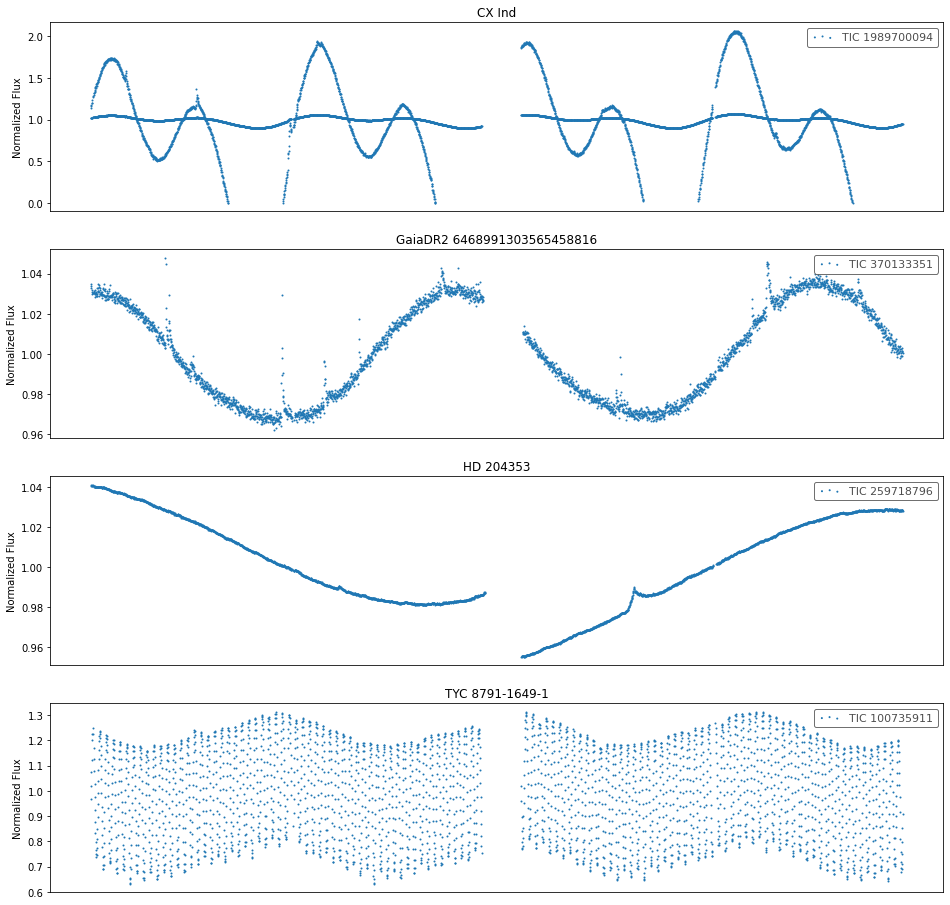

In [119]:
fig, axes = plt.subplots(4,1,figsize=(16,16))

for j, lname in enumerate(long_names):
    # print(j,lname)
    try:
        search = lk.search_lightcurve(lname,mission='TESS',exptime=600,author='QLP')
        assert(len(search) > 0)
    except:
        ra, dec = targets['RA'][names==lname][0], targets['Dec'][names==lname][0]
        print(ra,dec)
        coords = SkyCoord(ra, dec, unit=(u.deg, u.deg))
        search = lk.search_lightcurve(coords,mission='TESS',exptime=600,author='QLP')


    try: # multiple sectors
        lc = search.download_all().stitch().normalize()
    except: # single sector
        lc = search.download().normalize()
    
    lc = lc[lc.quality == 0].remove_nans().remove_outliers()
    
    
    lc.scatter(ax=axes[j])
    axes[j].set_title(lname)
    axes[j].set_xticks([])
    axes[j].set_xlabel('')

In [103]:
search

SearchResult containing 0 data products.

In [106]:
ra, dec = targets['RA'][names==lname][0], targets['Dec'][names==lname][0]
coords = SkyCoord(ra, dec, unit=(u.deg, u.deg))
search = lk.search_lightcurve(coords,mission='TESS',exptime=600,author='QLP')
lc = search.download_all().stitch().normalize()


time,flux,flux_err,cadenceno,sap_flux,kspsap_flux,kspsap_flux_err,quality,orbitid,sap_x,sap_y,sap_bkg,sap_bkg_err,kspsap_flux_sml,kspsap_flux_lag
,,,,,,,,,pix,pix,,,,
object,float32,float32,int32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32
2036.2862080000425,1.0264554023742676,0.001807749504223466,116470,1.0264574,0.99551237,0.0018077531,4096,61,137.8496551513672,1050.845947265625,-5125.54,250.35,0.99746245,0.9938922
2036.2931525254517,1.032698154449463,0.001807749504223466,116471,1.0327003,1.0015908,0.0018077531,0,62,137.85018920898438,1050.8470458984375,-5390.64,201.9,1.0010942,1.002145
2036.3000970505993,1.0349065065383911,0.001807749504223466,116472,1.0349087,1.0037549,0.0018077531,0,0,137.8516082763672,1050.848876953125,-5455.95,289.31,1.0022571,1.0055614
2036.307041575529,1.0337634086608887,0.001807749504223466,116473,1.0337656,1.0026668,0.0018077531,0,0,137.8519744873047,1050.848388671875,-5290.45,288.85,1.0014846,1.0036004
2036.3139861004588,1.0319716930389404,0.001807749504223466,116474,1.0319738,1.0009482,0.0018077531,0,0,137.85186767578125,1050.8509521484375,-5319.71,284.21,1.001033,1.0007586
2036.3209306253884,1.030937671661377,0.001807749504223466,116475,1.0309398,0.99996287,0.0018077531,0,0,137.85089111328125,1050.8507080078125,-5365.76,238.22,0.99979615,1.0000521
2036.3278751503283,1.0314130783081055,0.001807749504223466,116476,1.0314152,1.0004404,0.0018077531,4096,0,137.85174560546875,1050.8536376953125,-5274.05,242.71,1.00107,0.9998637
2036.3348196752584,1.0297410488128662,0.001807749504223466,116477,1.0297432,0.99883366,0.0018077531,0,0,137.85256958007812,1050.8536376953125,-5371.17,277.9,0.99844676,0.99958897


In [130]:
results = glob.glob('../results/driessen2/*output.txt')
savedir = '../results/driessen2/'

periods, flare_tots, flare_rates, sectors, tics = [], [], [], [], []

for j, name in tqdm(enumerate(names)):
    try:
        fname_in = '%s%s_output.txt' % (savedir,name.replace(' ','_').lower())

        f = open(fname_in)
        (name,period,nflares,flare_rate,nsectors,tic) = f.read().splitlines()
        f.close()

        periods.append(period)
        flare_rates.append(flare_rate)
        flare_tots.append(nflares)
        sectors.append(nsectors)
        tics.append(tic)
    except:
        periods.append(np.nan)
        flare_rates.append(np.nan)
        flare_tots.append(np.nan)
        sectors.append(np.nan)
        tics.append(np.nan)

periods = Column(np.array(periods),name='Rotation Period')
flare_tots = Column(np.array(flare_tots),name='N Flares')
flare_rates = Column(np.array(flare_rates),name='Flare Rate')
sectors = Column(np.array(sectors),name='N Sectors')
tics = Column(np.array(tics),name='TIC')

joined_driessen = targets['Name','RA','Dec']
joined_driessen.add_columns([periods,flare_rates,flare_tots,sectors,tics])


/var/folders/q3/wlh9qxyn1nxdm7v7l30qryf00000gn/T/ipykernel_33941/669198040.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, name in tqdm(enumerate(names)):


0it [00:00, ?it/s]

In [227]:
joined_driessen#['Rotation Period','Flare Rate','N Flares','N Sectors','TIC']

Name,RA,Dec,Rotation Period,Flare Rate,N Flares,N Sectors,TIC
str28,float64,float64,str8,str8,str3,str3,str9
2MASS J20423672-5425263,310.65314809,-54.4244116,0.664177,0.821327,20,1,394417221
BR Ind,317.84529103,-52.33928015,0.892292,1.298841,35,1,79225651
BS Ind,320.2494809,-52.47825602,0.217672,1.138507,68,2,79403459
CX Ind,315.33805664,-49.55210268,nan,nan,nan,nan,nan
GJ 841A,329.42143201,-51.00786556,1.126296,2.216635,109,2,140045538
GaiaEDR3 6454277531587440256,313.08503925,-61.18404427,nan,nan,nan,nan,nan
GaiaEDR3 6456110215608662144,316.35296311,-58.89587266,nan,nan,nan,nan,nan
GaiaEDR3 6469717187397726720,310.18691237,-56.24590926,nan,nan,nan,nan,nan
GaiaDR2 6468991303565458816,307.00048512,-56.16347531,nan,nan,nan,nan,nan


In [145]:
search = lk.search_lightcurve('TYC 8812-221-1',mission='TESS')
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,394006752,0.0
1,TESS Sector 01,2018,TESS-SPOC,1800,394006752,0.0
2,TESS Sector 01,2018,QLP,1800,394006752,0.0
3,TESS Sector 01,2018,TASOC,120,394006752,0.0
4,TESS Sector 01,2018,GSFC-ELEANOR-LITE,1800,394006752,0.0
5,TESS Sector 01,2018,TASOC,1800,394006752,0.0
6,TESS Sector 01,2018,TASOC,1800,394006752,0.0
7,TESS Sector 27,2020,TESS-SPOC,600,394006752,0.0
8,TESS Sector 27,2020,QLP,600,394006752,0.0


In [148]:
metadata

{'2MASS J20423672-5425263': {'exptime': 120.0, 'sectors': [27], 'nsectors': 1},
 'BR Ind': {'exptime': 120.0, 'sectors': [1, 27], 'nsectors': 2},
 'BS Ind': {'exptime': 120.0, 'sectors': [1, 27], 'nsectors': 2},
 'CX Ind': {'exptime': 600.0, 'sectors': [1, 27], 'nsectors': 2},
 'GJ 841A': {'exptime': 20.0, 'sectors': [1, 28], 'nsectors': 2},
 'GaiaEDR3 6454277531587440256': {'exptime': nan, 'nsectors': 0},
 'GaiaEDR3 6456110215608662144': {'exptime': nan, 'nsectors': 0},
 'GaiaEDR3 6469717187397726720': {'exptime': nan, 'nsectors': 0},
 'GaiaDR2 6468991303565458816': {'exptime': 600.0,
  'sectors': [13, 27],
  'nsectors': 2},
 'HD 195289': {'exptime': 120.0, 'sectors': [13, 27], 'nsectors': 2},
 'HD 204353': {'exptime': 600.0, 'sectors': [1, 27], 'nsectors': 2},
 'TYC 8791-1649-1': {'exptime': 600.0, 'sectors': [27], 'nsectors': 1},
 'TYC 8804-1252-1': {'exptime': 120.0, 'sectors': [27], 'nsectors': 1},
 'TYC 8810-234-1': {'exptime': 120.0, 'sectors': [1, 27], 'nsectors': 2},
 'TYC 881

In [149]:
0.892292*2

1.784584

In [170]:
search = lk.search_lightcurve('BS Ind',mission='TESS',exptime=120,author='SPOC')
# bs_ind = search.download_all().stitch().normalize().remove_nans()
bs_ind = search[0].download().normalize().remove_nans()
bs_ind = bs_ind[bs_ind.quality==0]

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

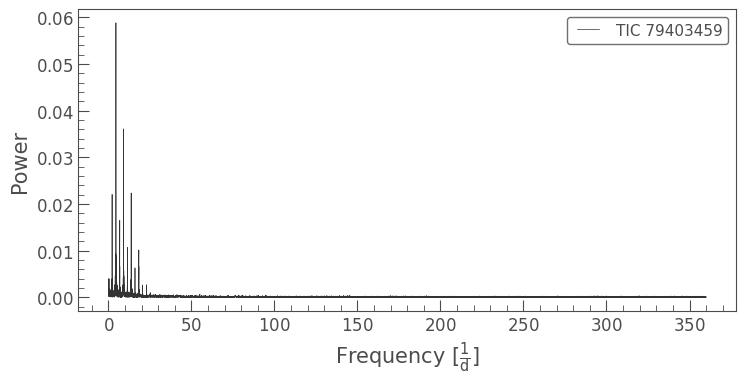

In [171]:
pgram = bs_ind.to_periodogram()
pgram.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

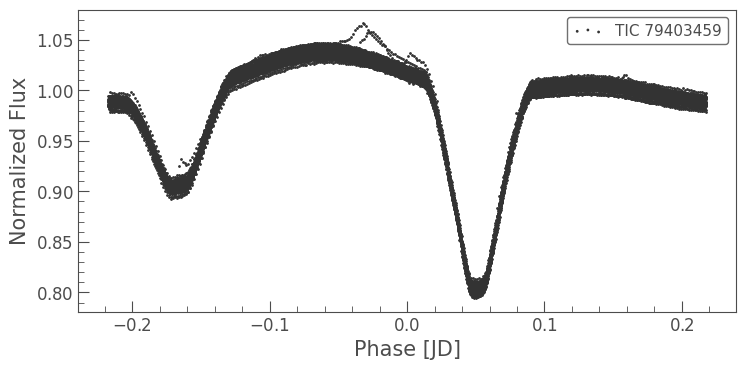

In [179]:
period = pgram.period_at_max_power*2
period = 0.435338*u.d
folded = bs_ind.fold(period)
folded.scatter()

In [181]:
bs_ind.targetid

79403459

In [197]:
search = lk.search_lightcurve('CX Ind')
search
# cx_ind = search[5].download().normalize().remove_nans().remove_outliers()
# pgram = cx_ind.to_periodogram()
# print(pgram.period_at_max_power)


#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,QLP,1800,79020594,0.0
1,TESS Sector 01,2018,GSFC-ELEANOR-LITE,1800,79020594,0.0
2,TESS Sector 01,2018,GSFC-ELEANOR-LITE,1800,1989700094,0.0
3,TESS Sector 01,2018,TASOC,1800,79020594,0.0
4,TESS Sector 01,2018,TASOC,1800,79020594,0.0
5,TESS Sector 27,2020,QLP,600,79020594,0.0
6,TESS Sector 27,2020,QLP,600,1989700094,0.0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

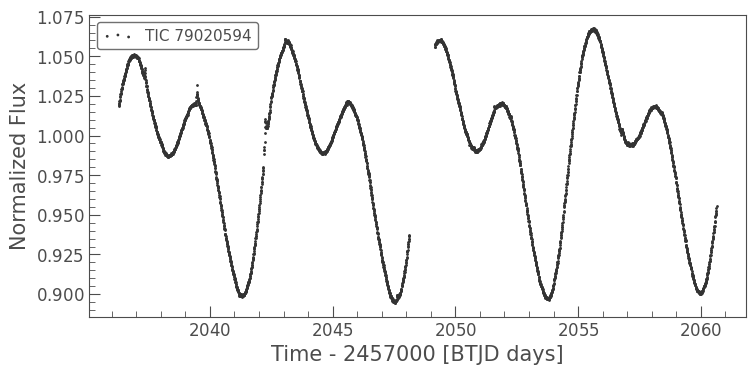

In [193]:
cx_ind.scatter()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

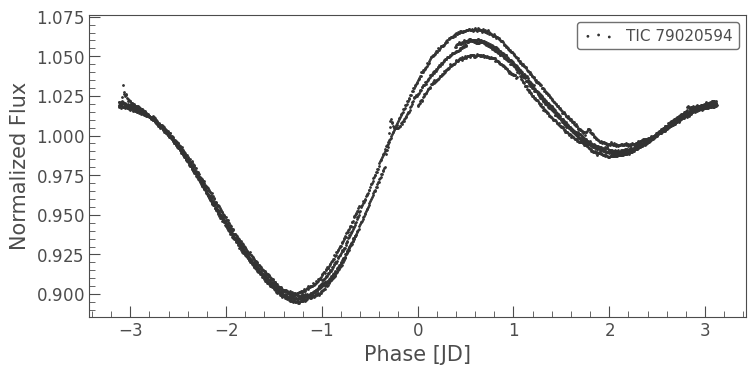

In [199]:
cx_ind.fold(6.2418205*u.d).scatter()

6.325629500106361 d


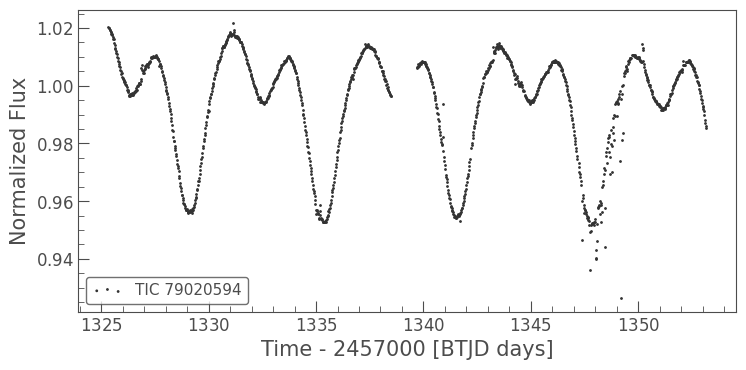

In [195]:
cx_ind_0 = search[0].download().normalize().remove_nans().remove_outliers()
cx_ind_0.scatter()
pgram0 = cx_ind_0.to_periodogram()
print(pgram0.period_at_max_power)


<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

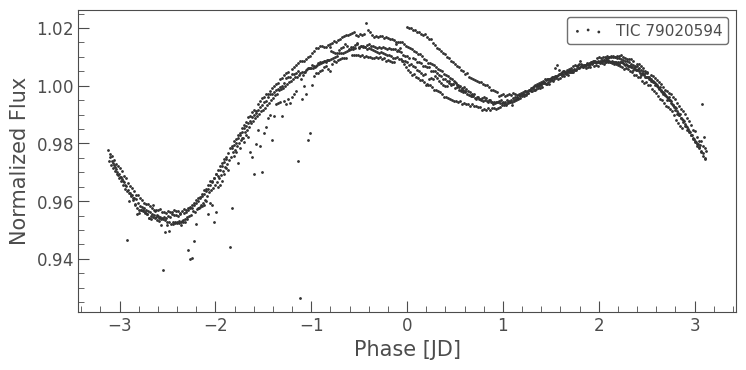

In [198]:
cx_ind_0.fold(6.2418205*u.d).scatter()

In [202]:
search = lk.search_lightcurve('GJ 841A',mission='TESS',exptime=120,author='SPOC')
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,140045538,0.0
1,TESS Sector 28,2020,SPOC,120,140045538,0.0


In [217]:
search = metadata['GaiaDR2 6468991303565458816']['search']
print(search)
sec13 = search[1].download().normalize().remove_nans().remove_outliers()
sec27 = search[4].download().normalize().remove_nans().remove_outliers()

SearchResult containing 5 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 13 2019 TESS-SPOC    1800   370133351      0.0
  1 TESS Sector 13 2019       QLP    1800   370133351      0.0
  2 TESS Sector 13 2019     CDIPS    1800   370133351      0.0
  3 TESS Sector 27 2020 TESS-SPOC     600   370133351      0.0
  4 TESS Sector 27 2020       QLP     600   370133351      0.0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

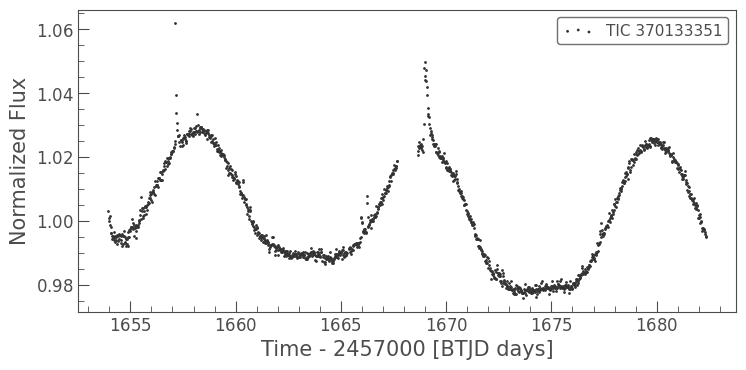

In [218]:
sec13.scatter()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

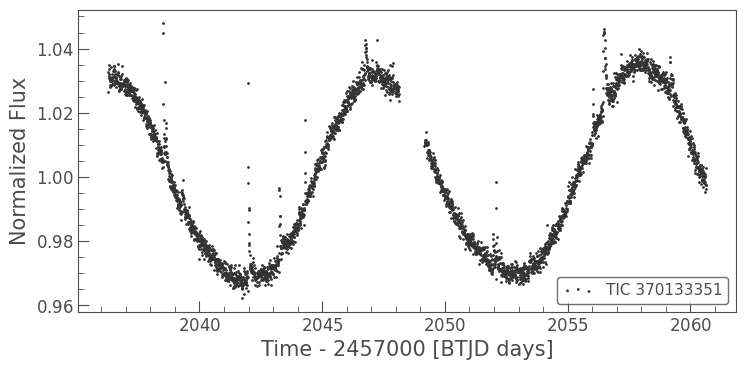

In [219]:
sec27.scatter()

11.07004950783769 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

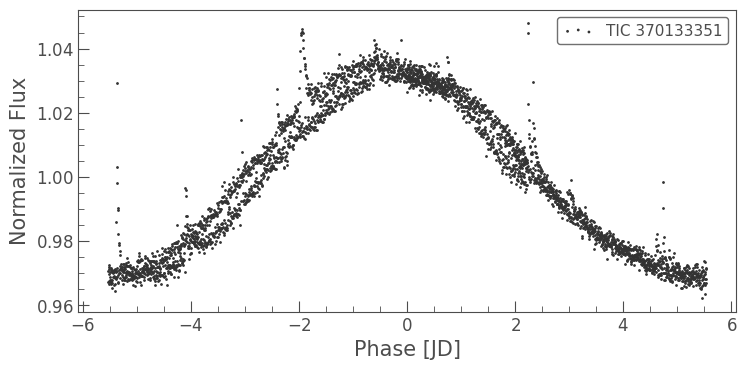

In [225]:
period = sec27.to_periodogram().period_at_max_power
print(period)
sec27.fold(period).scatter()

10.921666419265929 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

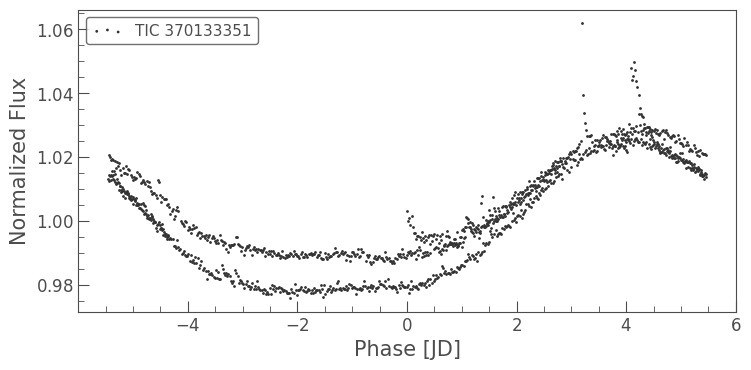

In [226]:
period = sec13.to_periodogram().period_at_max_power
print(period)
sec13.fold(period).scatter()

In [238]:
metadata['HD 204353']
search = metadata['HD 204353']['search']
print(search)
sec13 = search[0].download().normalize().remove_nans().remove_outliers()
sec13 = sec13[sec13.quality==0]
sec27 = search[4].download().normalize().remove_nans().remove_outliers()
sec27 = sec27[sec27.quality==0]


SearchResult containing 5 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 01 2018               QLP    1800   259718796      0.0
  1 TESS Sector 01 2018 GSFC-ELEANOR-LITE    1800   259718796      0.0
  2 TESS Sector 01 2018             TASOC    1800   259718796      0.0
  3 TESS Sector 01 2018             TASOC    1800   259718796      0.0
  4 TESS Sector 27 2020               QLP     600   259718796      0.0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

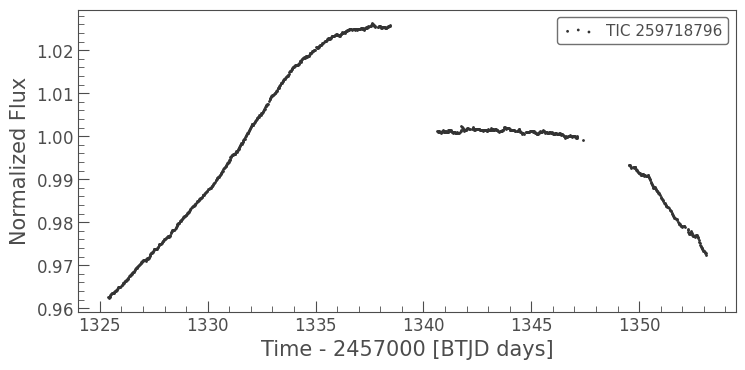

In [257]:
sec13.scatter()

<module 'matplotlib.pyplot' from '/Users/benjaminpope/opt/anaconda3/envs/lk/lib/python3.8/site-packages/matplotlib/pyplot.py'>

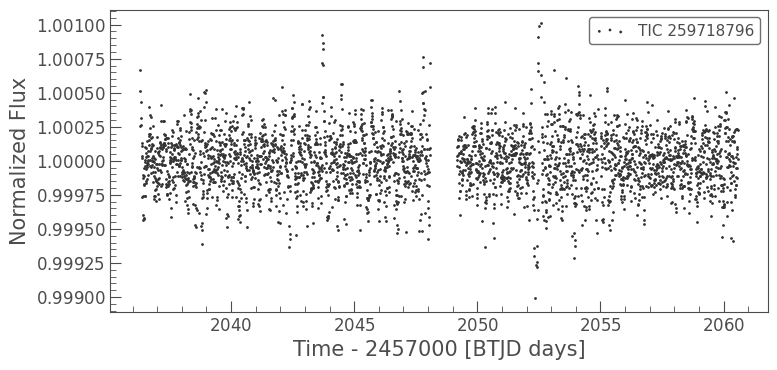

In [254]:
sec27.flatten().remove_outliers().scatter()
plt

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

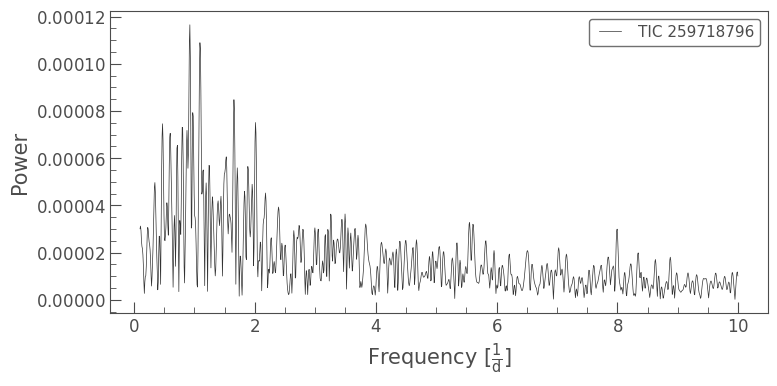

In [255]:
sec13.flatten()[:-100].to_periodogram(minimum_frequency=0.1/u.d,maximum_frequency=10./u.d).plot()

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

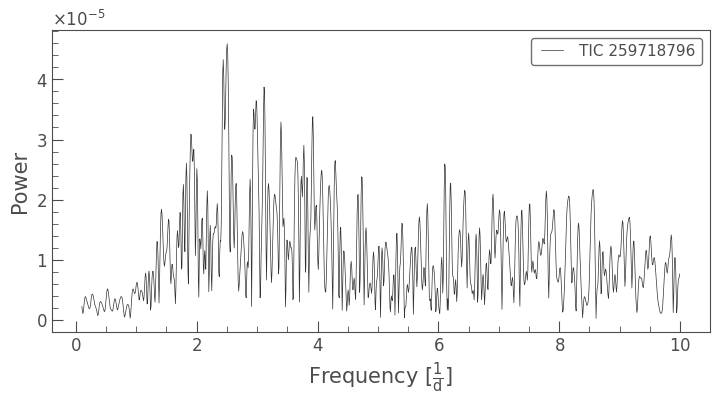

In [256]:
sec27.flatten().remove_outliers().to_periodogram(minimum_frequency=0.1/u.d,maximum_frequency=10./u.d).plot()

SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 27 2020    QLP     600   100735911      0.0
0.20261422471333293 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

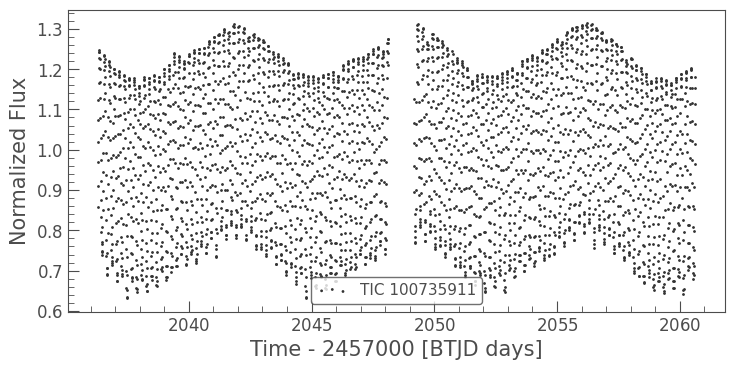

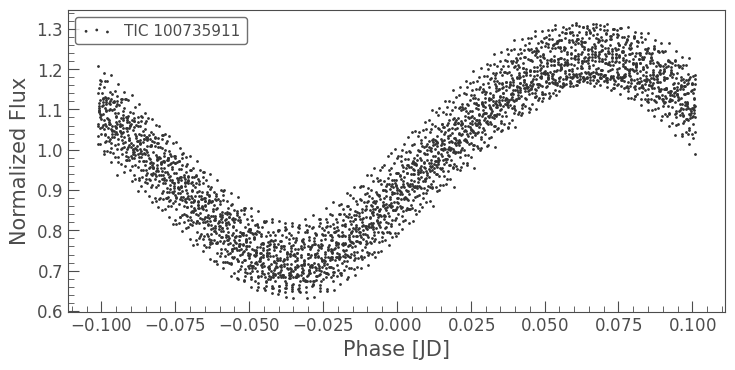

In [266]:
search = metadata['TYC 8791-1649-1']['search']
print(search)
s27 = search.download().normalize().remove_nans().remove_outliers()
s27.scatter()
pgram = s27.to_periodogram()
period = pgram.period_at_max_power
print(period)
folded = s27.fold(period)
folded.scatter()

In [272]:
search = lk.search_lightcurve('BO Ind')
print(search)
lc = search[0].download().normalize().remove_nans().remove_outliers()#.scatter()
pgram = lc.to_periodogram()
period = pgram.period_at_max_power
print(period)

SearchResult containing 3 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 27 2020      SPOC     120   100735916      0.0
  1 TESS Sector 27 2020 TESS-SPOC     600   100735916      0.0
  2 TESS Sector 27 2020       QLP     600   100735916      0.0
0.2023468671854212 d


In [275]:
metadata.keys()

dict_keys(['2MASS J20423672-5425263', 'BR Ind', 'BS Ind', 'CX Ind', 'GJ 841A', 'GaiaEDR3 6454277531587440256', 'GaiaEDR3 6456110215608662144', 'GaiaEDR3 6469717187397726720', 'GaiaDR2 6468991303565458816', 'HD 195289', 'HD 204353', 'TYC 8791-1649-1', 'TYC 8804-1252-1', 'TYC 8810-234-1', 'TYC 8812-221-1', 'Z Ind'])

In [290]:
lc_eb = metadata['TYC 8812-221-1']['search']
lc_eb


#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,394006752,0.0
1,TESS Sector 01,2018,TESS-SPOC,1800,394006752,0.0
2,TESS Sector 01,2018,QLP,1800,394006752,0.0
3,TESS Sector 01,2018,TASOC,120,394006752,0.0
4,TESS Sector 01,2018,GSFC-ELEANOR-LITE,1800,394006752,0.0
5,TESS Sector 01,2018,TASOC,1800,394006752,0.0
6,TESS Sector 01,2018,TASOC,1800,394006752,0.0
7,TESS Sector 27,2020,TESS-SPOC,600,394006752,0.0
8,TESS Sector 27,2020,QLP,600,394006752,0.0


In [283]:
folded.time

<TimeDelta object: scale='None' format='jd' value=[-1.19858185 -1.19852909 -1.19848204 ...  1.19887386  1.19887449
  1.19887672]>

In [294]:
metadata['TYC 8791-1649-1']

{'exptime': 600.0,
 'sectors': [27],
 'nsectors': 1,
 'search': SearchResult containing 1 data products.
 
  #     mission     year author exptime target_name distance
                                   s                 arcsec 
 --- -------------- ---- ------ ------- ----------- --------
   0 TESS Sector 27 2020    QLP     600   100735911      0.0}